In [2]:
# git clone repo để lấy data
!git clone https://github.com/lamtai2508/LNHONGTAI_DATA_ANALYTICS_SGU_2025.git

Cloning into 'LNHONGTAI_DATA_ANALYTICS_SGU_2025'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 54 (delta 13), reused 45 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 22.93 MiB | 32.93 MiB/s, done.
Resolving deltas: 100% (13/13), done.


# BAYES NGÂY THƠ (NAÏVE BAYES)



2.3.4 Bài thực hành số 2: Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu mushroom.

Dữ liệu lấy từ
https://www.kaggle.com/datasets/uciml/mushroom-classification/data

Bước 1: import những thư viện sẽ sử dụng

In [4]:
# Import thư viện
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Bước 2: chuẩn bị dữ liệu

In [6]:
# Đọc dữ liệu
df = pd.read_csv('/content/LNHONGTAI_DATA_ANALYTICS_SGU_2025/Data_Sets/mushrooms.csv')
# Mã hóa các thuộc tính dạng chữ
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Biến đầu ra: class (0 = edible, 1 = poisonous)
X = df.drop('class', axis=1)
y = df['class']

# Chia dữ liệu train, test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(df.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

Bước 3: Xây dựng mô hình Naïve Bayes

In [8]:
# Xây dựng mô hình Naïve Bayes
model = CategoricalNB()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

Bước 4: Đánh giá hiệu quả của mô hình

🎯 Accuracy: 0.9507692307692308

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       843
           1       0.99      0.91      0.95       782

    accuracy                           0.95      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127812 (\N{MUSHROOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


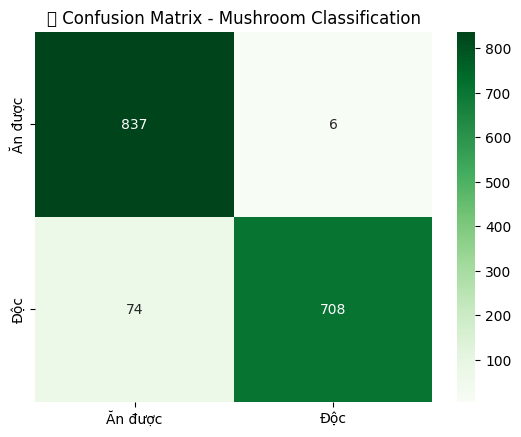

In [9]:
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Ăn được', 'Độc'],
            yticklabels=['Ăn được', 'Độc'])
plt.title("🍄 Confusion Matrix - Mushroom Classification")
plt.show()